In [29]:
# Import necessary libraries
import os
import requests
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Getting name, address, rating, phone number, review count for Village from Yelp API.

In [31]:
def get_restaurant_details(restaurant_name, location):
    # Yelp API URL
    api_url = "https://api.yelp.com/v3/businesses/search"

    # Set the headers
    headers = {
        "Authorization": f"Bearer {'JPfeykHuzlG8KZacdJkq6Dr_M5jemedXyzvxuxP0uDcL_g56FUokItmDgpXtTu5WN6MG0U8T4d6VL7C7IUGe1ijkir6JCf_J2ydzqRJrmTvg4Znh1cF_z7uLqJJUZ3Yx'}",
    }

    # Set up the parameters for the search
    params = {
        "term": restaurant_name,  # The restaurant's name
        "location": location,  # Location of the restaurant (e.g., city or address)
        "limit": 1  # Limit the results to just one
    }

    # Make the request
    response = requests.get(api_url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        if data['businesses']:
            return data['businesses'][0]  # Return the first business result
        else:
            return None  # No matching business found
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

restaurant_name = "Village The Soul of India"
location = "Hicksville, NY" 

restaurant_details = get_restaurant_details(restaurant_name, location)

if restaurant_details:
    print(f"Name: {restaurant_details['name']}")
    print(f"Rating: {restaurant_details['rating']}")
    print(f"Address: {', '.join(restaurant_details['location']['display_address'])}")
    print(f"Phone: {restaurant_details['display_phone']}")
    print(f"Review Count: {restaurant_details['review_count']}")
else:
    print("No details found for the given restaurant.")
print('\n')

Name: Village the soul of india
Rating: 4.8
Address: 11 West Marie St, Hicksville, NY 11801
Phone: (516) 859-0057
Review Count: 47




Getting top-rated 5 restaurants in 2 km with similar menu items.

In [32]:
print("top-rated 5 restaurants in 2 km with similar menu items\n")
def get_top_rated_restaurants(village_lat, village_lon, menu_categories):
    # Yelp API URL
    api_url = "https://api.yelp.com/v3/businesses/search"

    # Set the headers
    headers = {
        "Authorization": f"Bearer {'JPfeykHuzlG8KZacdJkq6Dr_M5jemedXyzvxuxP0uDcL_g56FUokItmDgpXtTu5WN6MG0U8T4d6VL7C7IUGe1ijkir6JCf_J2ydzqRJrmTvg4Znh1cF_z7uLqJJUZ3Yx'}",
    }

    # Set the search parameters
    params = {
        "term": "idly,dosa,biryani, vada, paneer",
        "latitude": village_lat,  # Latitude of Village restaurant
        "longitude": village_lon,  # Longitude of Village restaurant
        "radius": 2000,  # 2 km radius
        # "categories": menu_categories,  # Adjust based on menu items
        "sort_by": "rating",  # Top-rated restaurants
        "limit": 6,  # Get the top 6 results
    }

    # Make the API request
    response = requests.get(api_url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data.get("businesses", [])  # List of restaurants
    else:
        print(f"Error: {response.status_code}, {response.json()}")
        return []

# Test the function
village_lat = 40.7666984378756  
village_lon = -73.52367747486602  

restaurants = get_top_rated_restaurants(village_lat, village_lon, menu_categories)

# Display results
for idx, restaurant in enumerate(restaurants, start=1):
    if restaurant['name']!='Village the soul of india':
        print(f"{idx-1}. {restaurant['name']}")
        print(f"   Rating: {restaurant['rating']}")
        print(f"   Address: {', '.join(restaurant['location']['display_address'])}")
        print(f"   Distance: {restaurant['distance']:.2f} meters\n")
print('\n')

top-rated 5 restaurants in 2 km with similar menu items

1. Taste Of Chennai
   Rating: 4.4
   Address: 39 W John St, Hicksville, NY 11801
   Distance: 436.22 meters

2. Dosa World
   Rating: 4.3
   Address: 355 S Broadway, Hicksville, NY 11801
   Distance: 995.44 meters

3. Chennai Dosas
   Rating: 4.2
   Address: 128 Broadway, Hicksville, NY 11801
   Distance: 155.00 meters

4. Mithaas - Hicksville
   Rating: 3.8
   Address: 217 Bethpage Rd, Hicksville, NY 11801
   Distance: 1347.93 meters

5. House of Dosas
   Rating: 3.7
   Address: 416 S Broadway, Hicksville, NY 11801
   Distance: 1263.09 meters





Getting Menu items and prices for Village restaurant.

In [33]:
# These are some of the actual menu items from the Village Restaurant website.
menu_items = {
    "idly": 5.95,
    "medu vada": 5.95,
    "mysore bonda": 4.95,
    "masala dosa": 9.95,
    "plain uthappam": 8.95,
    "paneer": 11.95,
    "chole bature": 12.95,
    "roti": 3.95,
    "paratha": 4.95,
    "dum biryani": 11.95,
    "gulab jamun": 4.95
}
# Printing the menu items with prices
for item, price in menu_items.items():
    print(f"{item}: ${price}")
print('\n')

idly: $5.95
medu vada: $5.95
mysore bonda: $4.95
masala dosa: $9.95
plain uthappam: $8.95
paneer: $11.95
chole bature: $12.95
roti: $3.95
paratha: $4.95
dum biryani: $11.95
gulab jamun: $4.95




NOTE: These prices are considered as lowest local prices i.e. Rain = 0 mm, Temperature >= 45 F, Busy Times = 1. 

Getting temperature & rain near Village Restaurant.

In [34]:
def celsius_to_fahrenheit(celsius):
    fahrenheit = (celsius * 9/5) + 32
    return fahrenheit

def get_weather_data(latitude, longitude):
    api_key = "4ea4150df2e7e53d2a4c7f407684da66"  
    weather_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {
        "lat": latitude,
        "lon": longitude,
        "appid": api_key,
        "units": "metric",  # Get temperature in Celsius
    }

    response = requests.get(weather_url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "temperature": data["main"]["temp"],
            "rain": data.get("rain", {}).get("1h", 0),  # Rain volume in the last hour
        }
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# Example usage
weather = get_weather_data(latitude=40.7666984378756, longitude=-73.52367747486602)
if weather:
    weather['temperature']=celsius_to_fahrenheit(weather['temperature'])
    print(f"Temperature: {weather['temperature']} F")
    print(f"Rainfall: {weather['rain']} mm")
else:
    print("Failed to fetch weather data.")
print('\n')

Temperature: 43.466 F
Rainfall: 0 mm




NOTE: I was unable to access GoogleMaps API key since it requires payment, hence I will be using the feature "Busy Times" to be 1 to 5 range.
While prediction, I will be explictly assigning busytime. 
Rest of the features are successfully taken through APIs and will be used in prediction in later codes.

Since there was no training dataset, I made a function to create the training dataset with features "Menu item", "Temperature in F", "Rain in mm", Busy times" and the output is the "price" of the menu item in dollars.

In [61]:
# Function to create dataset with linear logic using integer values
def create_training_data():
    training_data = []

    for _ in range(10000):  # Create 100 sample data points
        # Randomly select menu item
        menu_item = random.choice(list(menu_items.keys()))
        lowest_price = menu_items[menu_item]

        # Random temperature (in Fahrenheit) as integer
        temp = random.randint(20, 70)  # Between 20°F and 90°F

        # Random busy times (1 to 5 scale) as integer
        busy_times = random.randint(1, 5)

        # Random rain condition (0 to 50 mm) as integer
        rain = random.randint(0, 50)  # Rainfall in mm (integer)

        # Price calculation based on linear logic

        # Temperature-based price adjustment (linear scaling)
        temp_increase = (45 - temp) * 0.1  # Every degree below 45°F increases the price by 0.1 unit
        temp_increase = max(temp_increase,0)
        # Rain-based price adjustment (linear scaling)
        rain_increase = rain * 0.05  # Every mm of rain increases the price by 0.05 units

        # Popularity-based price adjustment (linear scaling)
        popularity_increase = (busy_times - 1) * 0.5  # For each unit above 1 in busy_times, price increases by 0.5

        # Total price adjustment
        price_increase = temp_increase + rain_increase + popularity_increase

        # Apply the price increment to the lowest price
        price = round(lowest_price + price_increase, 2)  # Round to 2 decimal places for price

        # Append data to the list
        training_data.append([menu_item, temp, busy_times, rain, price])

    # Convert the data into a pandas DataFrame for better visualization
    df = pd.DataFrame(training_data, columns=["Menu Item", "Temperature (°F)", "Busy Times", "Rain (mm)", "Price"])
    return df

# Generate the training dataset
dataset = create_training_data()

In [62]:
# Display the first few rows of the dataset
print(dataset.head())

      Menu Item  Temperature (°F)  Busy Times  Rain (mm)  Price
0        paneer                45           3         38  14.85
1   masala dosa                45           3         24  12.15
2     medu vada                65           5         45  10.20
3  chole bature                41           2         25  15.10
4        paneer                48           2         18  13.35


NOTE: The created dataset contains 10,000 entries.

Storing the dataset as a csv file.

In [63]:
# Optionally save the dataset to a CSV file
dataset.to_csv("restaurant_menu_pricing.csv", index=False)

I trained 3 models "Linear Regression", "Decision Tree", "Random Forest" and chose the Random Forest model since it has given the best performance.

Model: Linear Regression
  Mean Absolute Error: 2.69
  Mean Squared Error: 8.52
  R² Score: 0.29
----------------------------------------


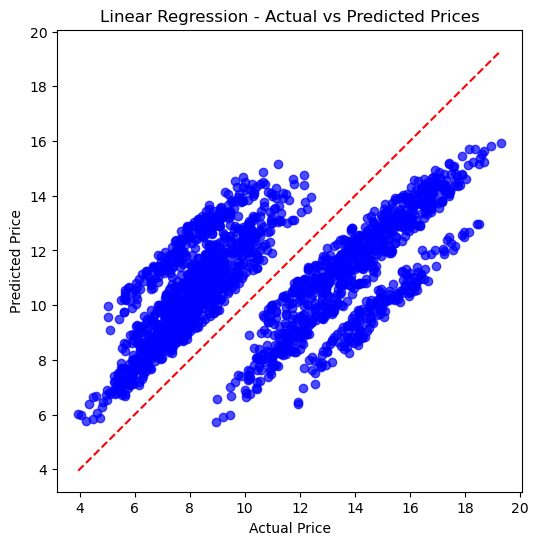

Model: Decision Tree
  Mean Absolute Error: 0.12
  Mean Squared Error: 0.04
  R² Score: 1.00
----------------------------------------


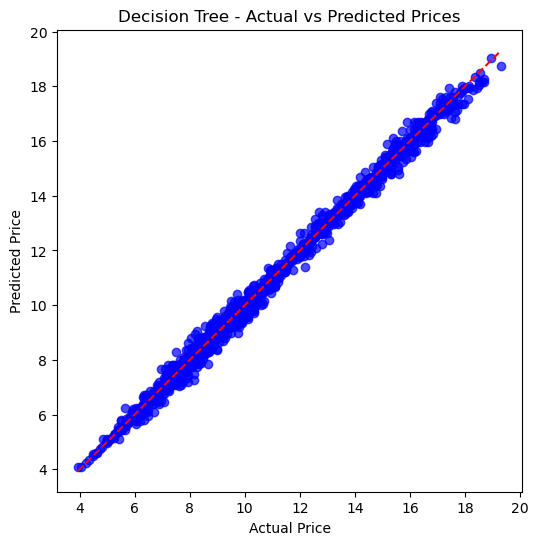

Model: Random Forest
  Mean Absolute Error: 0.07
  Mean Squared Error: 0.01
  R² Score: 1.00
----------------------------------------


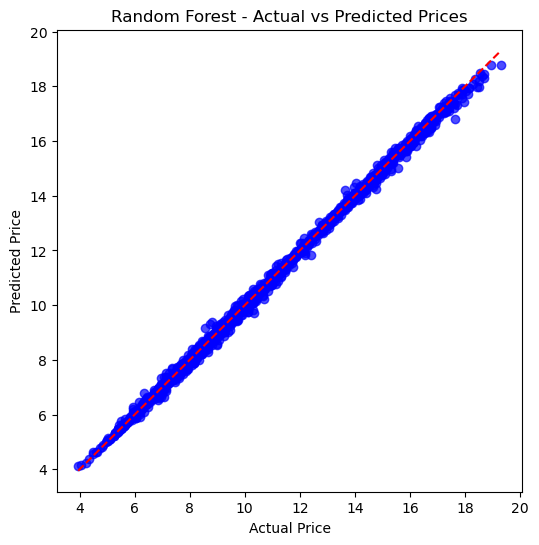

In [64]:
encoder = LabelEncoder()
dataset['Menu Item'] = encoder.fit_transform(dataset['Menu Item'])

# Splitting the dataset into features (X) and target variable (y)
X = dataset.drop("Price", axis=1)  # Features
y = dataset["Price"]  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models, and print performance metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print performance metrics
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R² Score: {r2:.2f}")
    print("----------------------------------------")

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Actual vs Predicted Prices')
    plt.show()

Function to predict the price of a menu item using Random Forest Model.

In [65]:
# Function to predict price for new input data
def predict_price(menu_item, temperature, busy_times, rain_mm):
    # Preprocess the input values
    menu_item_encoded = encoder.transform([menu_item])[0]  # Encode the menu item

    # Create a 2D array for prediction (as required by the model)
    input_data = pd.DataFrame([[menu_item_encoded, temperature, busy_times, rain_mm]],
                              columns=["Menu Item", "Temperature (°F)", "Busy Times", "Rain (mm)"])

    # Predict the price using the trained model (Random Forest is the best here)
    predicted_price = models["Random Forest"].predict(input_data)
    return predicted_price[0]

Feature 1: Menu item: Manually given.

Feature 2: Temperature: Obtained from Open Weather Map API.

Feature 3: Busy Times: Manually given.

Feature 4: Rain: Obtained from Open Weather Map API.

In [66]:
# Example usage: Provide inputs for prediction
menu_item = "chole bature"  # The menu item you want to predict the price for
temperature = celsius_to_fahrenheit(weather['temperature'])  # Temperature in Fahrenheit
busy_times = 3  # Busy times on a scale of 1 to 5
rain_mm = weather['rain']  # Rain in mm

# Predict the price using Random Forest
predicted_price = predict_price(menu_item, temperature, busy_times, rain_mm)
print(f"Predicted Price for {menu_item}: ${predicted_price:.2f}")

Predicted Price for chole bature: $13.98
